<a href="https://colab.research.google.com/github/sunitha-18577/Python-Fundamentals/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/toyota.csv')

In [ ]:
data=pd.DataFrame({
    'Doors':[4,4,2,4,4,2,4,4,2,4],
    'Weight':[1100,1200,1050,1150,1250,1000,1180,1220,1080,1130],
    'Quarterly_Tax':[100,110,90,105,115,90,108,110,112,98],
    'Price':[15000,16000,14500,15500,16500,14000,15800,16200,14800,15300],
    'Age':[5,3,7,4,2,8,3,2,6,4],
    'KM':[100000,50000,150000,75000,25000,200000,60000,30000,120000,80000],
    'FuelType':['Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Petrol','Diesel'],
    'HP':[110,90,110,90,110,90,110,90,110,90],
    'Automatic':[0,1,0,1,0,1,0,1,0,1],
    'cc':[1600,2000,1600,2000,1600,2000,1600,2000,1600,2000]
})

In [ ]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
           Doors       Weight  Quarterly_Tax         Price        Age  \
count  10.000000    10.000000      10.000000     10.000000  10.000000   
mean    3.400000  1136.000000     103.800000  15360.000000   4.400000   
std     0.966092    79.330532       8.929352    793.305322   2.065591   
min     2.000000  1000.000000      90.000000  14000.000000   2.000000   
25%     2.500000  1085.000000      98.500000  14850.000000   3.000000   
50%     4.000000  1140.000000     106.500000  15400.000000   4.000000   
75%     4.000000  1195.000000     110.000000  15950.000000   5.750000   
max     4.000000  1250.000000     115.000000  16500.000000   8.000000   

                  KM          HP  Automatic           cc  
count      10.000000   10.000000  10.000000    10.000000  
mean    89000.000000  100.000000   0.500000  1800.000000  
std     55116.039206   10.540926   0.527046   210.818511  
min     25000.000000   90.000000   0.000000  1600.000000  
25%     52500.000000   90.

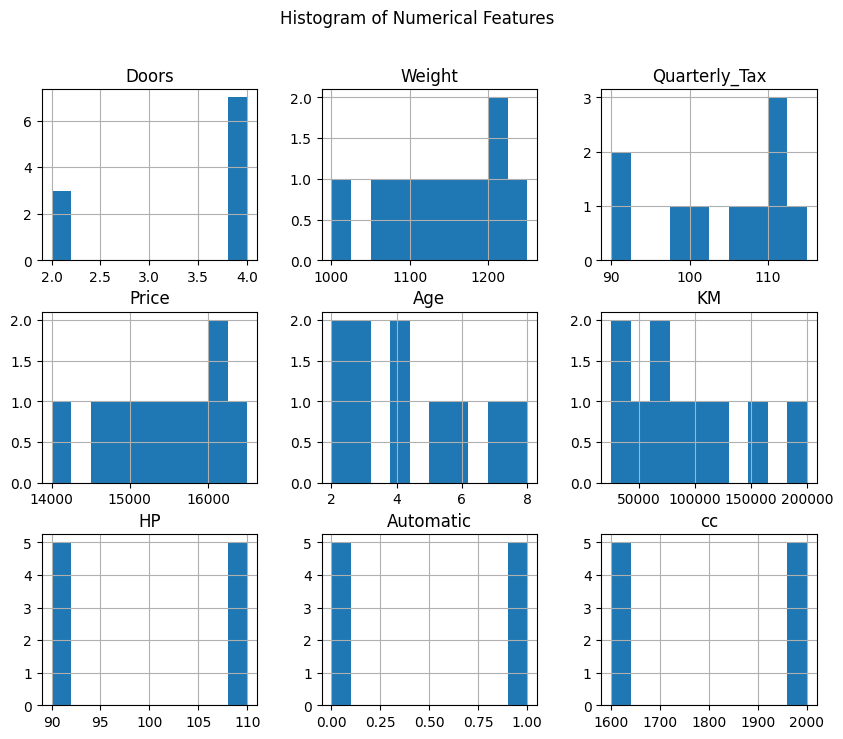

In [ ]:
data.hist(bins=10, figsize=(10,8))
plt.suptitle('Histogram of Numerical Features')
plt.show()

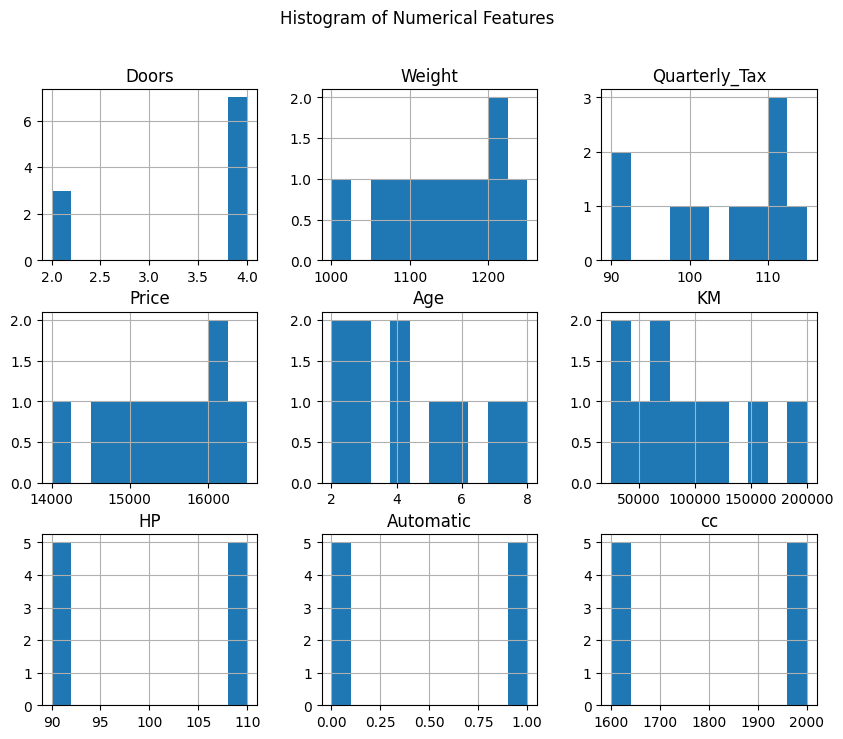

In [ ]:
data.hist(bins=10, figsize=(10,8))
plt.suptitle('Histogram of Numerical Features')
plt.show()

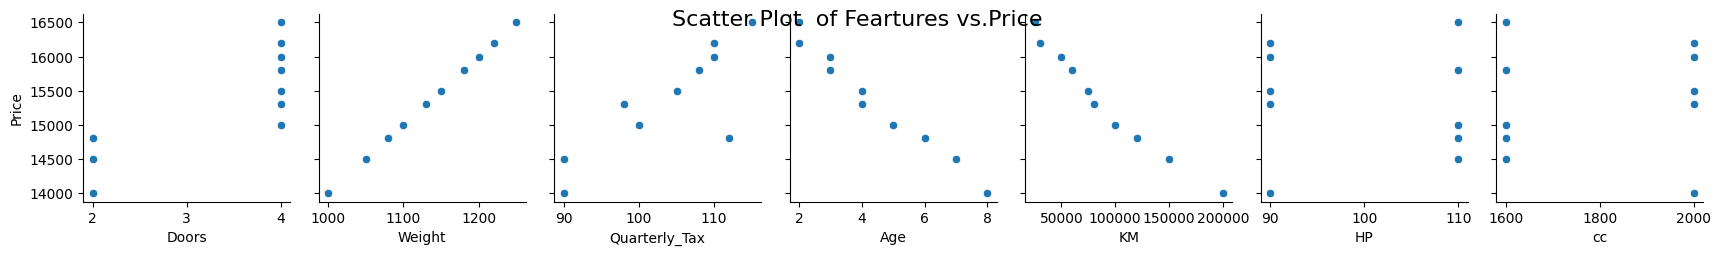

In [ ]:
sns.pairplot(data,x_vars=['Doors','Weight','Quarterly_Tax','Age','KM','HP','cc'],y_vars='Price',kind='scatter')
plt.suptitle("Scatter Plot  of Feartures vs.Price ",fontsize=16)
plt.show()

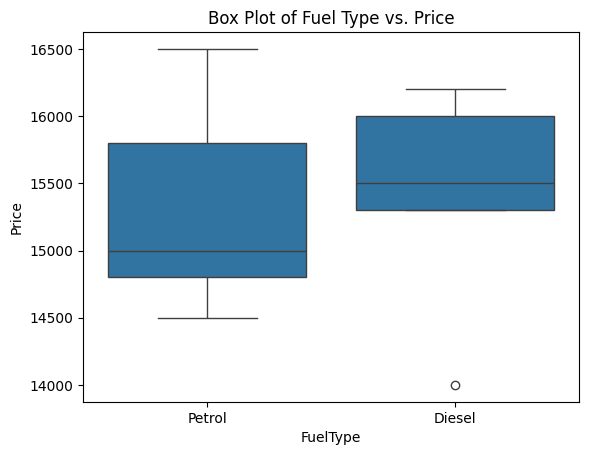

In [ ]:
sns.boxplot(x='FuelType',y='Price',data=data)
plt.title('Box Plot of Fuel Type vs. Price')
plt.show()

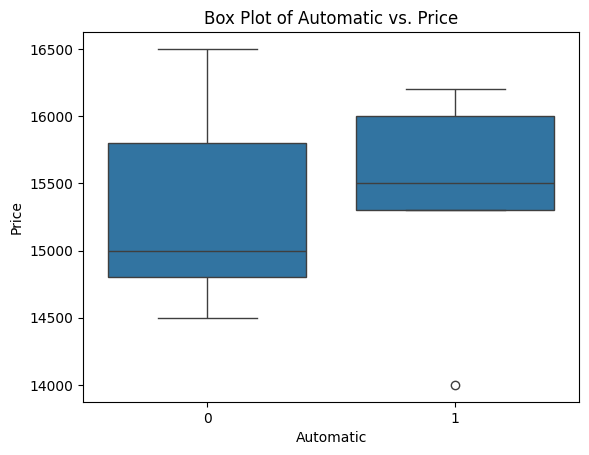

In [ ]:
sns.boxplot(x='Automatic',y='Price',data=data)
plt.title('Box Plot of Automatic vs. Price')
plt.show()

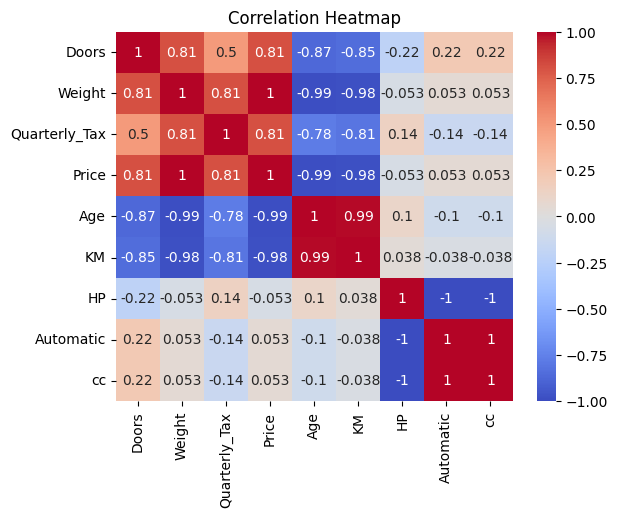

In [ ]:
correlation_matrix=data.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data=pd.get_dummies(data,columns=['FuelType'],drop_first=True,dtype=int)

In [ ]:
x=data.drop('Price',axis=1)
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
model1=LinearRegression()
model1.fit(x_train_scaled,y_train)
y_pred1=model1.predict(x_test_scaled)

In [ ]:
model2=Lasso(alpha=1.0)
model2.fit(x_train_scaled,y_train)
y_pred2=model2.predict(x_test_scaled)

In [ ]:
model3=Ridge(alpha=1.0)
model3.fit(x_train_scaled,y_train)
y_pred3=model3.predict(x_test_scaled)

In [ ]:
def evaluate_model(y_true,y_pred,model_name):
  mse=mean_squared_error(y_true,y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_true,y_pred)
  print(f"model:{model_name}")
  print(f"Mean Squared Error (RMSE):{mse:.2f}")
  print(f"R-squared(R2):{r2:.2f}")
  print(f"R-squared(R2):{r2:.2f}")
  print("----------------------")

In [ ]:
print("Model Coefficients:")
for feature,coef in zip(x.columns,model1.coef_):
  print(f"{feature}:{coef}")

Model Coefficients:
Doors:-2.8421709430404007e-13
Weight:785.811682275086
Quarterly_Tax:-3.836930773104541e-13
Age:1.7905676941154525e-12
KM:-2.4016344468691386e-12
HP:1.9895196601282805e-13
Automatic:-8.526512829121202e-14
cc:-8.526512829121202e-14
FuelType_Petrol:8.526512829121202e-14


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
print("Model Evaluation:")
evaluate_model(y_test,y_pred1,'Linear Regression')
evaluate_model(y_test,y_pred2,'Lasso Regression')
evaluate_model(y_test,y_pred3,'Ridge Regression')

Model Evaluation:
model:Linear Regression
Mean Squared Error (RMSE):0.00
R-squared(R2):1.00
R-squared(R2):1.00
----------------------
model:Lasso Regression
Mean Squared Error (RMSE):0.88
R-squared(R2):1.00
R-squared(R2):1.00
----------------------
model:Ridge Regression
Mean Squared Error (RMSE):81551.04
R-squared(R2):0.77
R-squared(R2):0.77
----------------------


In [ ]:
print("Model Coefficients:")
print("Linear Regression Coefficients:",model1.coef_)
print("Lasso Regression Coefficients:",model2.coef_)
print("Ridge Regression Coefficients:",model3.coef_)

Model Coefficients:
Linear Regression Coefficients: [-2.84217094e-13  7.85811682e+02 -3.83693077e-13  1.79056769e-12
 -2.40163445e-12  1.98951966e-13 -8.52651283e-14 -8.52651283e-14
  8.52651283e-14]
Lasso Regression Coefficients: [ 0.00000000e+00  7.82609918e+02  0.00000000e+00 -2.01870161e+00
 -1.41340915e-01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]
Ridge Regression Coefficients: [ -21.67033459  236.43913027  179.88163569 -182.90366106 -184.43005996
    2.87195883   -2.87195883   -2.87195883    2.87195883]


In [ ]:
print("\nInterview Questions:")
print("1.What is Normalization and Standardizationand how it is helpful? ")
print("Normalization and Standardization are scaling techniques used to bring fatures to a similsr range.Normalization scales data between 0 and 1,while standardization scales data to have a mean of 0 and a standard deviation of 1.They are helpul in machine learningg.")
print("2.what techniques can be used to address multicollinearityin MLR? ")
print("Multicollinearity occurs when independent variables in a regression model are highly correlated .Techniques to address multicollinearity include ")
print("-Removing one of the correlated variables")
print("-Combining correlated variables into a single variable")
print("-Using regularization techniques like Ridge regression")
print("-Principal Component Analysis (PCA) to reduce dimensionality")


Interview Questions:
1.What is Normalization and Standardizationand how it is helpful? 
Normalization and Standardization are scaling techniques used to bring fatures to a similsr range.Normalization scales data between 0 and 1,while standardization scales data to have a mean of 0 and a standard deviation of 1.They are helpul in machine learningg.
2.what techniques can be used to address multicollinearityin MLR? 
Multicollinearity occurs when independent variables in a regression model are highly correlated .Techniques to address multicollinearity include 
-Removing one of the correlated variables
-Combining correlated variables into a single variable
-Using regularization techniques like Ridge regression
-Principal Component Analysis (PCA) to reduce dimensionality
